# Kacker Okapuu Loss Correlation 

Kacker Okapuu Loss correlation is an update to Ainley Mathieson and Dunham Came's correlations used to estimate pressure loss for axial turbines. These correlations can work with turbines that are not impulse. There's also factors that take into account the mach number entering and leaving the blade. 

One thing to note is with these loss models, the authors attempt to derive an equation that couples physical geometry with the effects of loss in experimental measurements. 

The purpose of this tutorial is to illustrate how to use the csv files containing plot data to build a dataset pickle file for the loss model code kackerokapuu.py to load and predict the pressure loss.



## Gather the files
The figures/graphs have been exported to a csv format. We need to read those in and build surface splines to fit the data. Lets clone the repositories

In [ ]:
!git clone https://github.com/nasa/turbo-design.git
!cp -r turbo-design/references/Turbines/KackerOkapuu/*.csv .

## Build a dataset pickle file

Ainley Mathieson paper contains many equations and figures. Of all the equations and figures the following are used to compute loss: Figure 04(a,b), Figure 08 and Equation 4.

In [20]:
!pip install turbo-design

ERROR: Could not find a version that satisfies the requirement td3 (from versions: none)
ERROR: No matching distribution found for td3


In [21]:
from turbodesign import LossInterp

In [22]:
Fig01_beta0 = LossInterp("Fig01_beta0.csv", 
                        xlabel="Pitch/Chord",
                        ylabel="Yp",
                        clabel="alpha2")

Fig02 = LossInterp("Fig02_beta=alpha2.csv",
                        xlabel="Pitch/Chord",
                        ylabel="Yp",
                        clabel="alpha2")

Fig04 = LossInterp("Fig04_tmax_c.csv",
                        xlabel="beta1+beta2",
                        ylabel="tmax/c")

Fig05 = LossInterp("Fig05_stagger.csv",
                        xlabel="beta1",
                        ylabel="stagger",
                        clabel="beta2")

Fig08_K1 = LossInterp("Fig08_K1.csv",
                        xlabel="M2",
                        ylabel="K1")

Fig09_K2 = LossInterp("Fig09_K2.csv",
                        xlabel="M1/M2",
                        ylabel="K2")

Fig14_Axial_Entry = LossInterp("Fig14_axial_entry_nozzle.csv",
                                        xlabel="t/o",
                                        ylabel="delta phi tet 2"),
            
Fig14_Impulse = LossInterp("Fig14_impulse_blading.csv",
                                        xlabel="t/o",
                                        ylabel="delta phi tet 2")
            
import pickle, os, pathlib
default_home = os.path.join(os.path.expanduser("~"), ".cache")
os.environ['TD3_HOME'] = os.path.join(default_home,'TD3_LossModels')
os.makedirs(os.environ['TD3_HOME'],exist_ok=True)
path = pathlib.Path(os.path.join(os.environ['TD3_HOME'],"kackerokapuu"+".pkl"))

with open(path.absolute(),'wb') as f:
	pickle.dump({
				'Fig01_beta0':Fig01_beta0,
				'Fig02':Fig02,
				'Fig04':Fig04,
				'Fig05':Fig05,
				'Fig08_K1':Fig08_K1,
				'Fig09_K2':Fig09_K2,
				'Fig14_Axial_Entry': Fig14_Axial_Entry,
				'Fig14_Impulse':Fig14_Impulse
			},f)

c:\Users\pjuangph\Anaconda3\envs\dev\Lib\site-packages\scipy\interpolate\_fitpack2.py:1424: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=23). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  warnings.warn(message)
c:\Users\pjuangph\Anaconda3\envs\dev\Lib\site-packages\scipy\interpolate\_fitpack2.py:1424: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=23). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  warnings.warn(message)
c:\Users\pjuangph\Anaconda3\envs\dev\Lib\site-packages\scipy\interpolate\_fitpack2.py:1424: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solut

## Validating Results

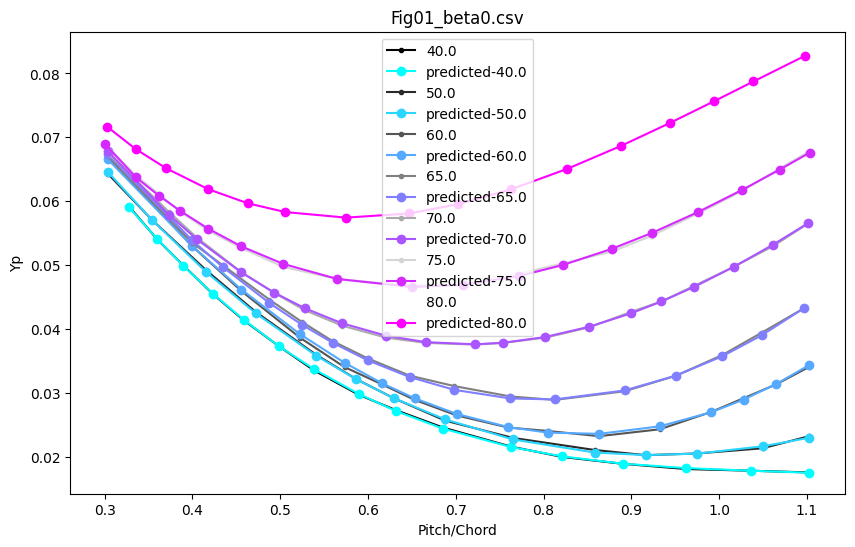

In [23]:
Fig01_beta0.plot()

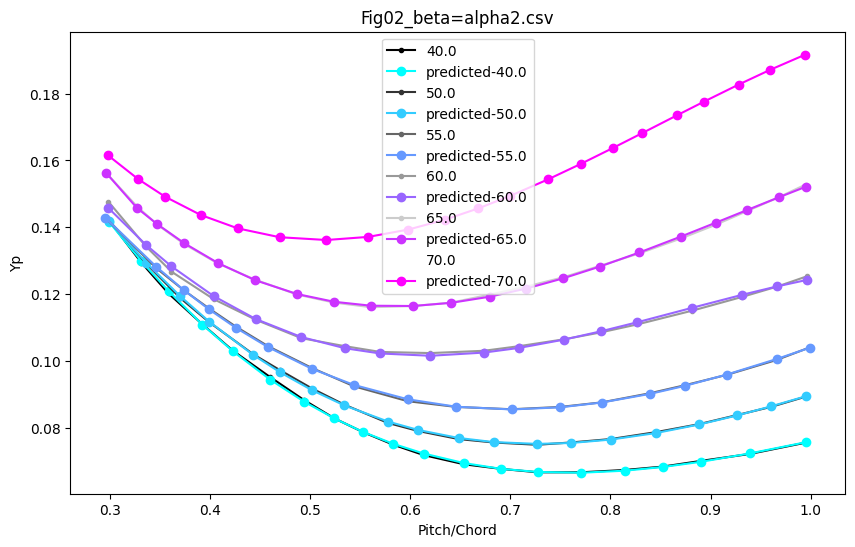

In [24]:
Fig02.plot()

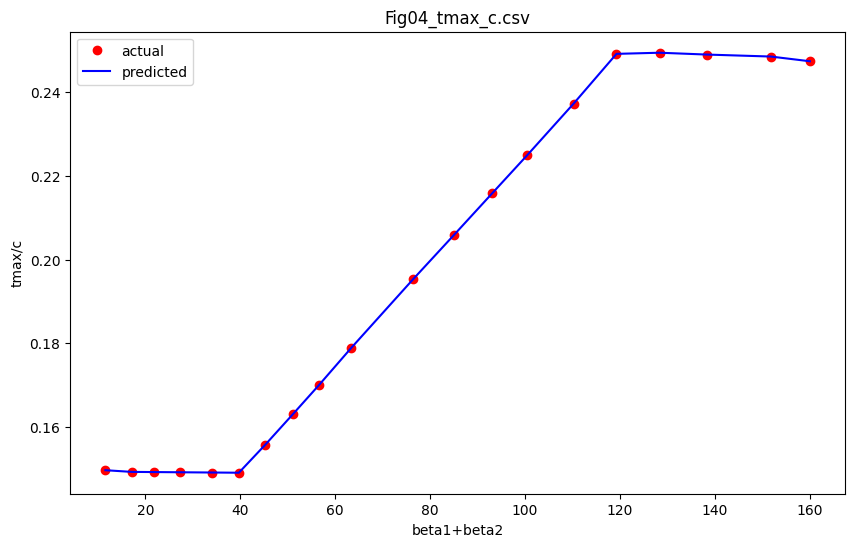

In [25]:
Fig04.plot()

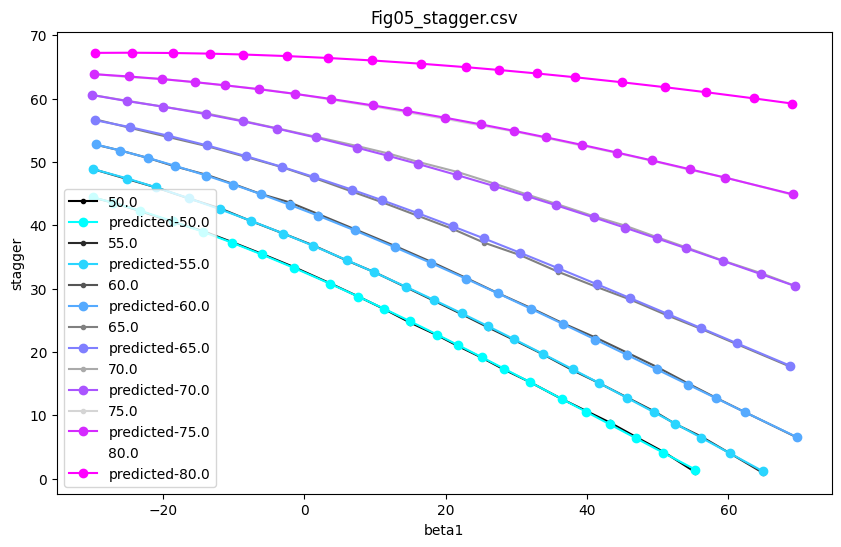

In [26]:
Fig05.plot()

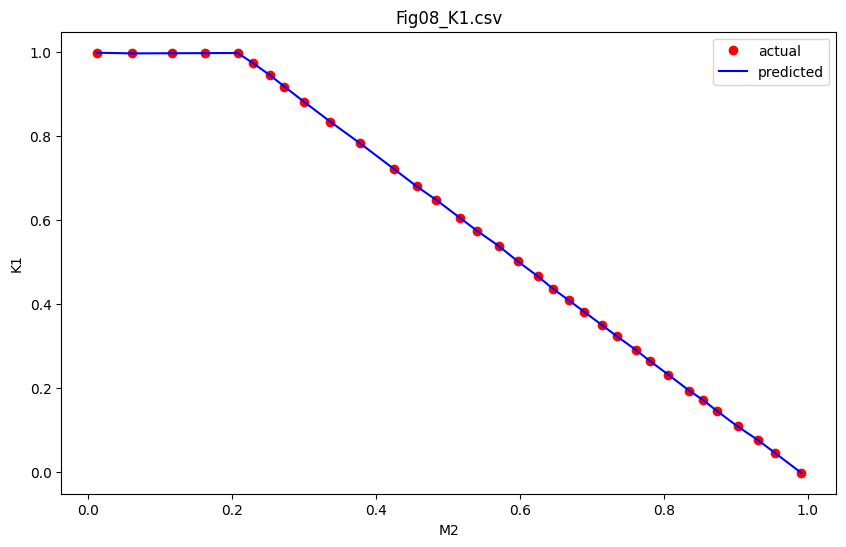

In [27]:
Fig08_K1.plot()

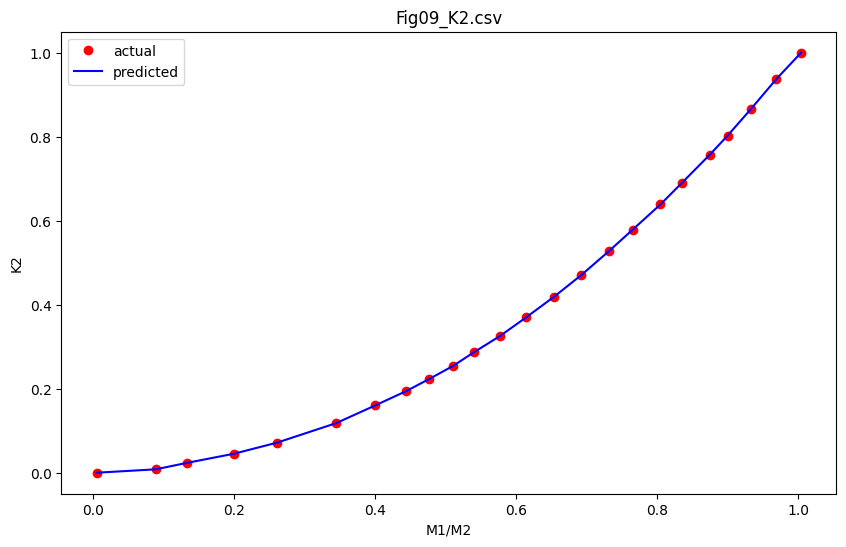

In [28]:
Fig08_K2.plot()

In [ ]:
Fig14_Axial_Entry.plot()

In [ ]:
Fig14_Impulse.plot()

In [29]:
# Extracting Data 

print(Fig09_K2(0.4))

0.16139663810758362
